v_mean = 3.04
v_mean_th = 5.00
v_mean_th_eff = 5.00


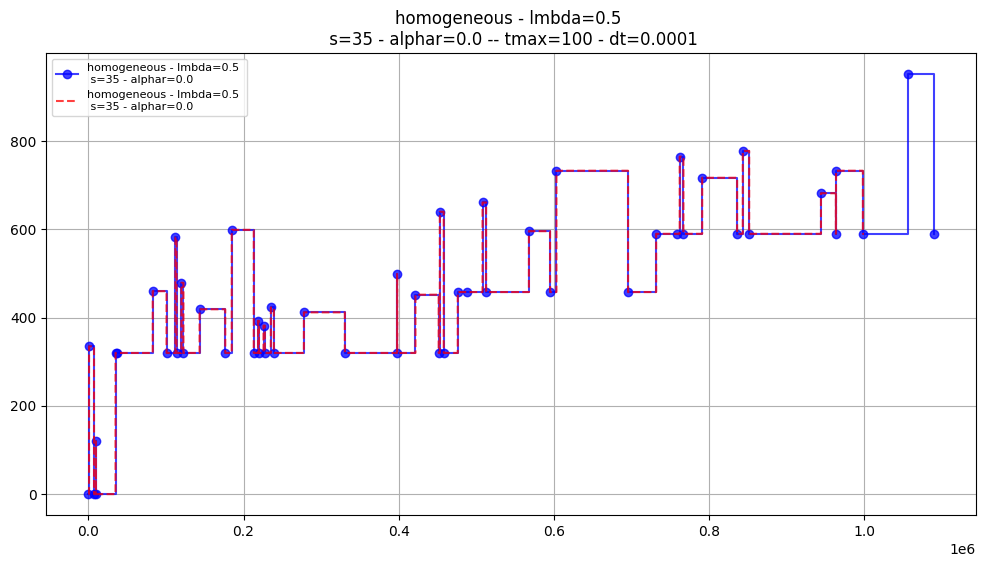

--------------------------------------------------------------------------------------------------------------------------
v_mean = 3.88
v_mean_th = 5.00
v_mean_th_eff = 5.00


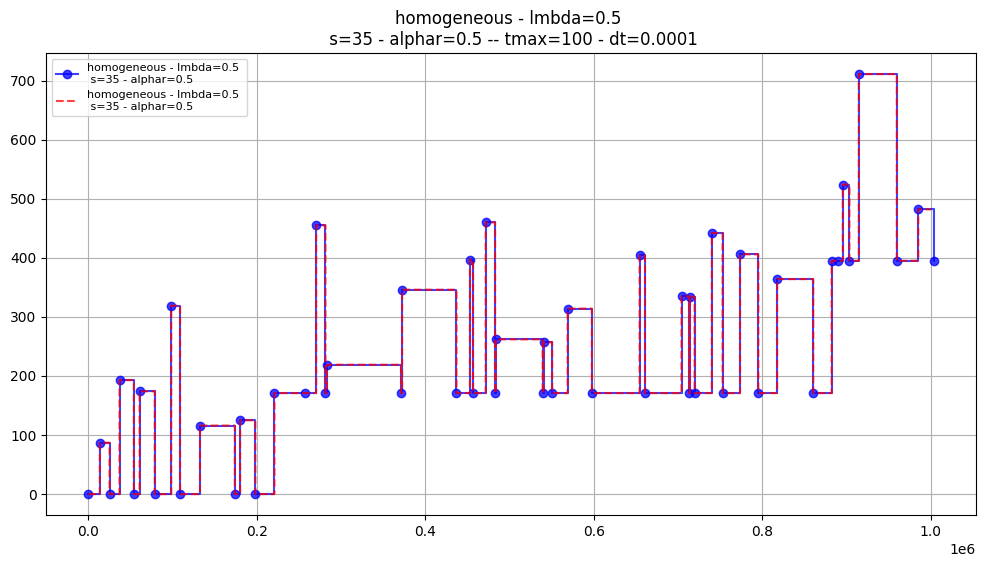

--------------------------------------------------------------------------------------------------------------------------
v_mean = 5.67
v_mean_th = 5.00
v_mean_th_eff = 5.00


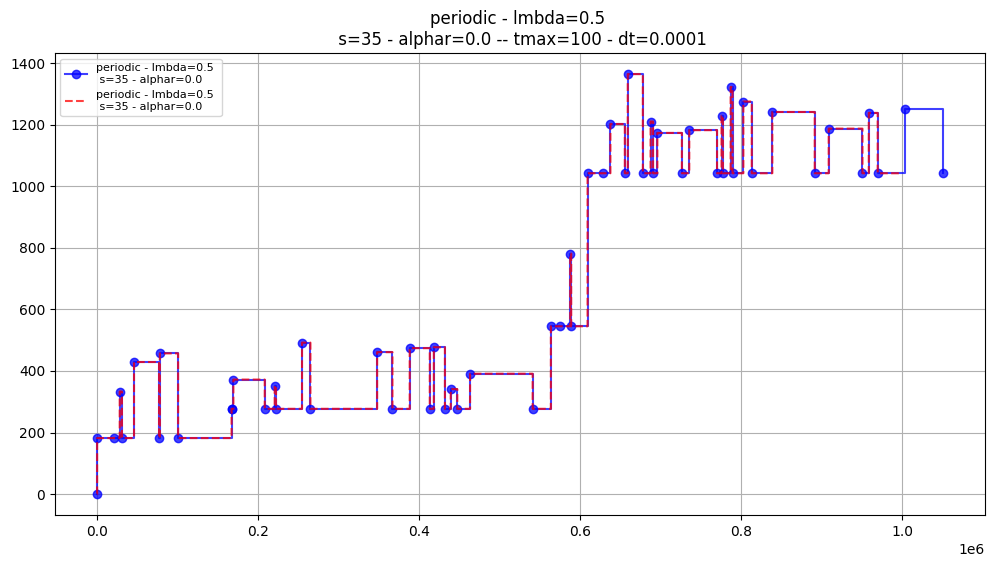

--------------------------------------------------------------------------------------------------------------------------
v_mean = 7.85
v_mean_th = 5.00
v_mean_th_eff = 5.00


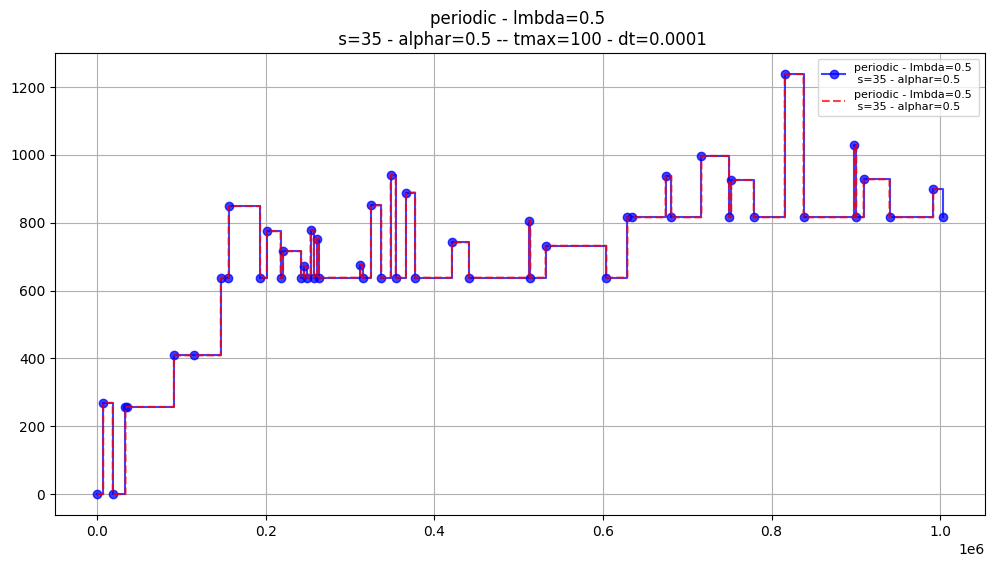

--------------------------------------------------------------------------------------------------------------------------
v_mean = 6.36
v_mean_th = 5.00
v_mean_th_eff = 5.00


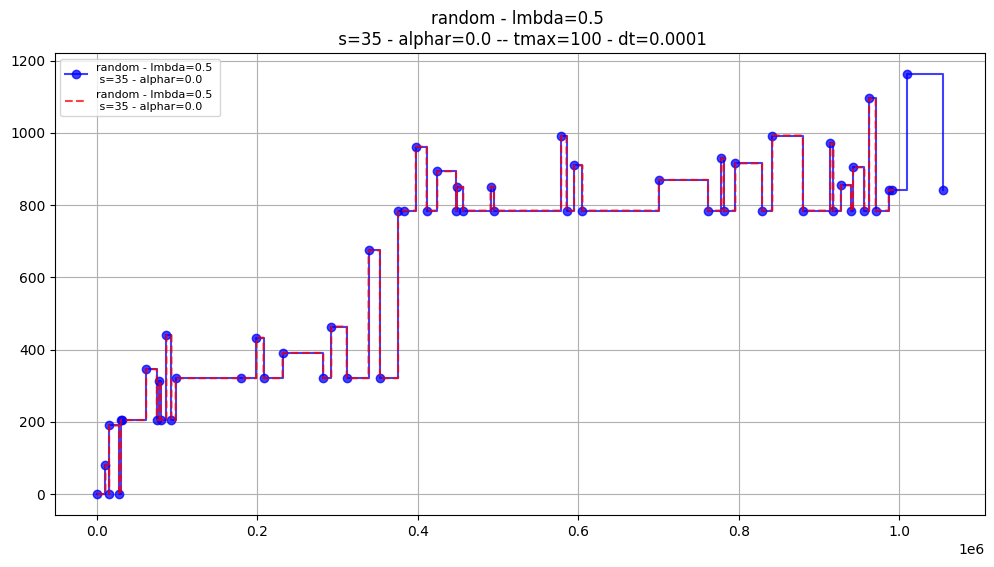

--------------------------------------------------------------------------------------------------------------------------
v_mean = 11.09
v_mean_th = 5.00
v_mean_th_eff = 5.00


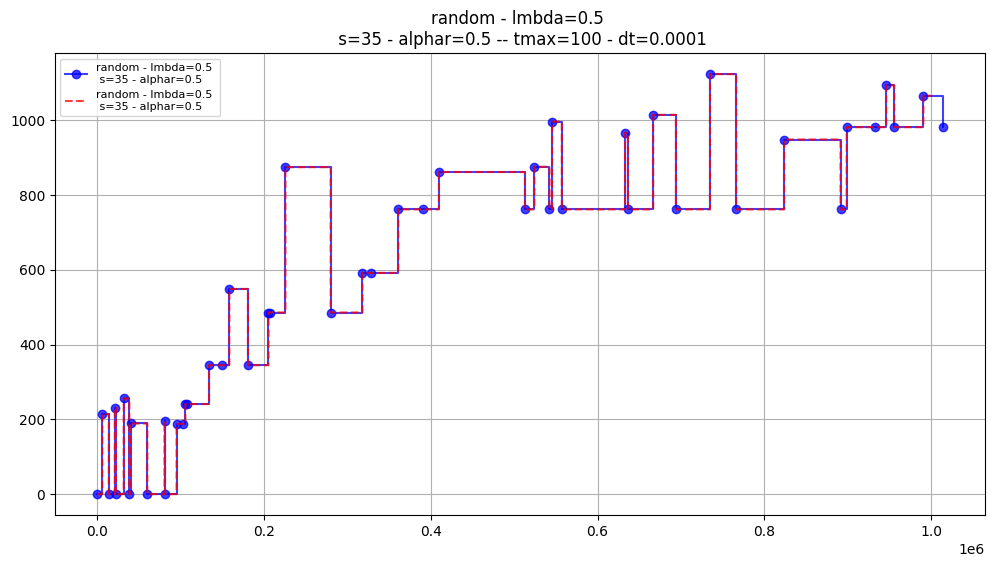

--------------------------------------------------------------------------------------------------------------------------


In [2]:
# Librairies
import numpy as np
import matplotlib.pyplot as plt
import polars as pl
from pathlib import Path


# Load files
root = Path("/home/nicolas/Documents/PhD/Workspace/nucleo/outputs/2025-12-15__PC/nucleo__shorttest_errors")
root = Path("/home/nicolas/Documents/PhD/Workspace/nucleo/outputs/2025-12-17__PC/nucleo__shorttest_0")
paths = [str(p) for p in root.glob("*/**/*.parquet")] or [str(p) for p in root.glob("*/*.parquet")]
df_all = (
    pl.scan_parquet(paths)
    .collect()
    .sort(by=["landscape", "s", "l", "lmbda", "alphar"])
)


# Loop
n_rows = df_all.height
cmap = plt.cm.plasma
colors = [cmap(i / max(n_rows - 1, 1)) for i in range(n_rows)]

for color, row in zip(colors, df_all.iter_rows(named=True)):
    
    plt.figure(figsize=(12,6))
    
    results     = row["results"]
    t_matrix    = row["t_matrix"]
    x_matrix    = row["x_matrix"]
    landscape   = row["landscape"]
    lmbda       = row["lmbda"]
    alphar      = row["alphar"]
    s           = row["s"]
    dt          = row["dt"]
    tmax        = row["tmax"]
    title       = f"{landscape} - lmbda={lmbda} \n s={s} - alphar={alphar}"
    
    
    t_matrix = np.array(t_matrix, dtype=float)
    x_matrix = np.array(x_matrix, dtype=float)
    # results  = np.array(results, dtype=int)
    
    v_mean = row["v_mean"]
    v_mean_th = row["v_mean_th"]
    v_mean_th_eff = row["v_mean_th_eff"]
    
    print(f"v_mean = {v_mean:.2f}")
    print(f"v_mean_th = {v_mean_th:.2f}")
    print(f"v_mean_th_eff = {v_mean_th_eff:.2f}")

    rank = 2
    
    plt.title(f"{title} -- tmax={tmax} - dt={dt}")
    plt.plot(t_matrix[rank] / dt, x_matrix[rank], color="b", alpha=0.75,
             label=title, drawstyle="steps-post", marker="o")
    plt.plot(np.arange(len(results[rank])), results[rank], color="r", alpha=0.75,
             label=title, drawstyle="steps-post", ls="--")
    plt.legend(fontsize=8)
    plt.grid(True)
    plt.show()
    # print(f"{results[rank]}")
    # print(f"{t_matrix[rank]}")
    # print(f"{x_matrix[rank]}")
    print("--------------------------------------------------------------------------------------------------------------------------")

homogeneous - lmbda=0.5 
 s=35 - alphar=0.0 

v_mean : 5.19
v_mean_th : 5.00
v_mean_th_eff : 5.00


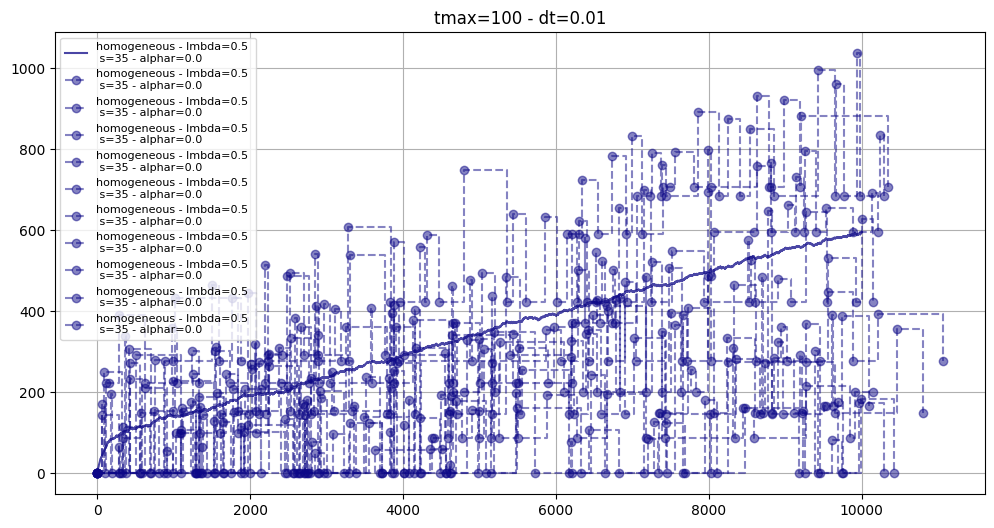

homogeneous - lmbda=0.5 
 s=35 - alphar=0.5 

v_mean : 4.85
v_mean_th : 5.00
v_mean_th_eff : 5.00


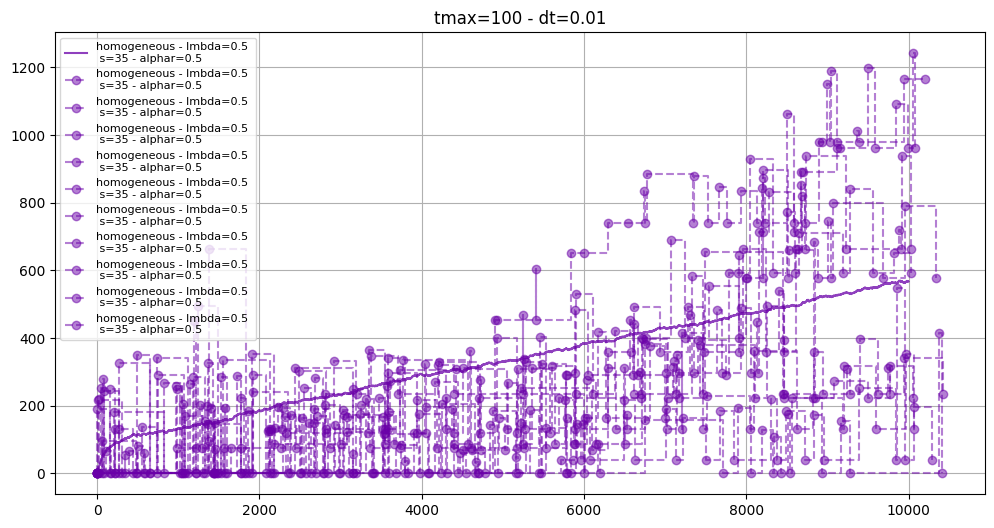

periodic - lmbda=0.5 
 s=35 - alphar=0.0 

v_mean : 13.99
v_mean_th : 5.00
v_mean_th_eff : 5.00


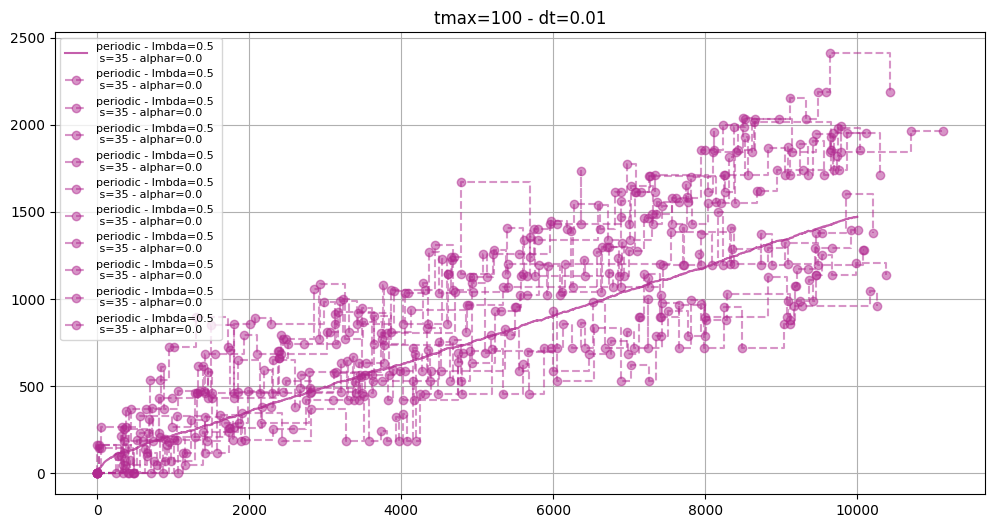

periodic - lmbda=0.5 
 s=35 - alphar=0.5 

v_mean : 9.30
v_mean_th : 5.00
v_mean_th_eff : 5.00


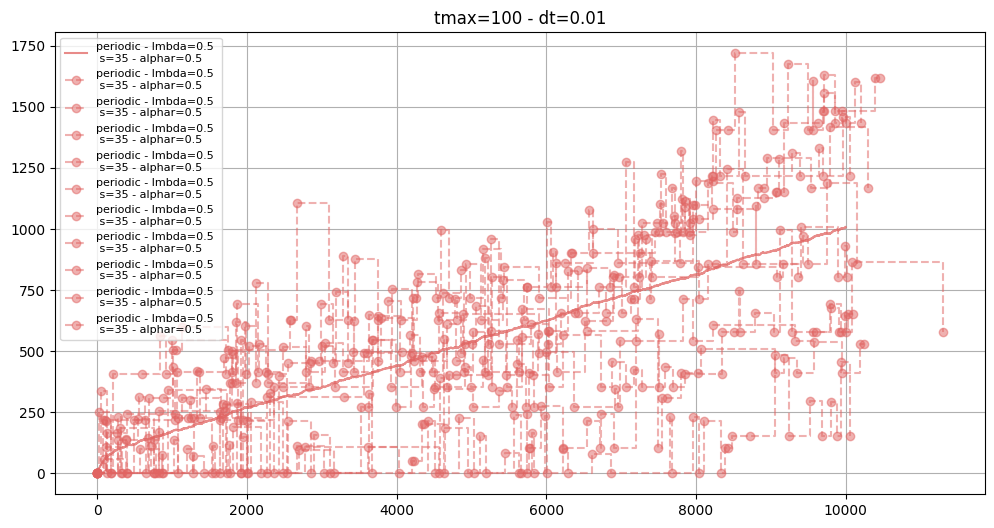

random - lmbda=0.5 
 s=35 - alphar=0.0 

v_mean : 13.86
v_mean_th : 5.00
v_mean_th_eff : 5.00


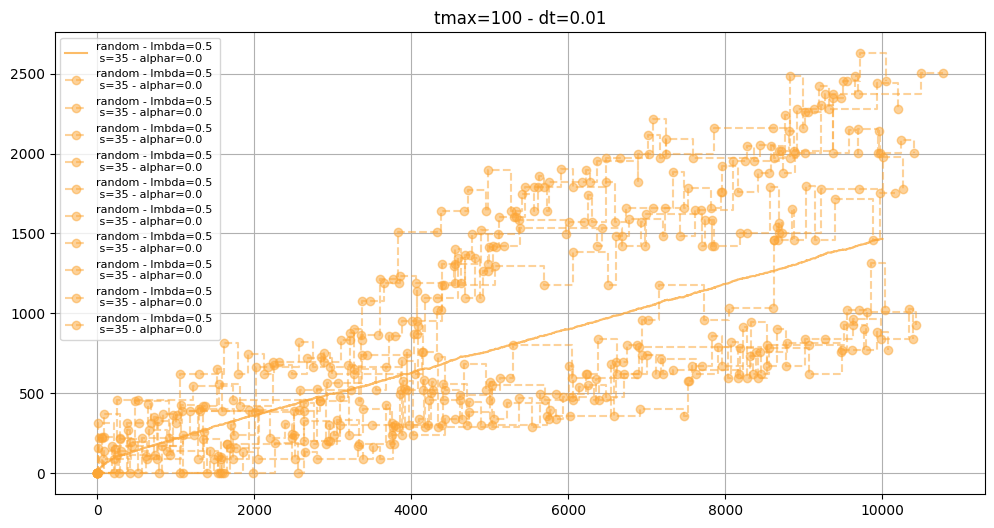

random - lmbda=0.5 
 s=35 - alphar=0.5 

v_mean : 9.39
v_mean_th : 5.00
v_mean_th_eff : 5.00


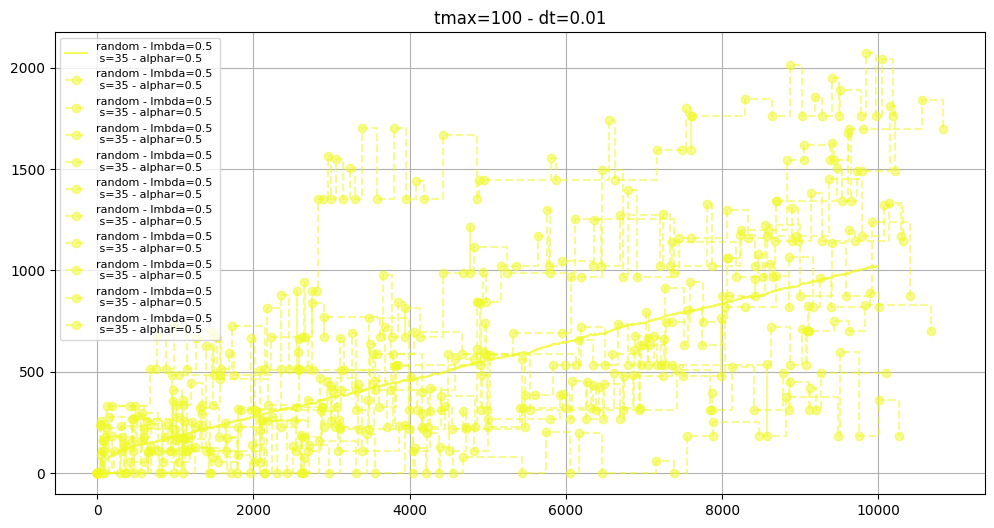

In [4]:
# Librairies
import numpy as np
import matplotlib.pyplot as plt
import polars as pl
from pathlib import Path


# Load files
root = Path("/home/nicolas/Documents/PhD/Workspace/nucleo/outputs/2025-12-16__PC/nucleo__shorttest_0")
paths = [str(p) for p in root.glob("*/**/*.parquet")] or [str(p) for p in root.glob("*/*.parquet")]
df_all = (
    pl.scan_parquet(paths)
    .collect()
    .sort(by=["landscape", "s", "l", "lmbda", "alphar"])
)


# Loop
n_rows = df_all.height
cmap = plt.cm.plasma
colors = [cmap(i / max(n_rows - 1, 1)) for i in range(n_rows)]

for color, row in zip(colors, df_all.iter_rows(named=True)):
    
    plt.figure(figsize=(12,6))
    
    results     = row["results"]
    t_matrix    = row["t_matrix"]
    x_matrix    = row["x_matrix"]
    landscape   = row["landscape"]
    lmbda       = row["lmbda"]
    alphar      = row["alphar"]
    s           = row["s"]
    dt          = row["dt"]
    tmax        = row["tmax"]
    results_mean = row["results_mean"]
    title       = f"{landscape} - lmbda={lmbda} \n s={s} - alphar={alphar}"
    
    to_plot     = results[1]
    t_matrix = np.array(t_matrix, dtype=float)
    x_matrix = np.array(x_matrix, dtype=float)
    
    v_mean      = row["v_mean"]
    v_med       = row["v_med"]
    v_mean_th    = row["v_mean_th"]
    v_mean_th_eff    = row["v_mean_th_eff"]
    
    print(f"{title} \n")
    print(f"v_mean : {v_mean:.2f}")
    # print(f"v_med : {v_med:.2f}")
    print(f"v_mean_th : {v_mean_th:.2f}")
    print(f"v_mean_th_eff : {v_mean_th_eff:.2f}")
    
    plt.title(f"tmax={tmax} - dt={dt}")
    plt.plot(results_mean, color=color, alpha=0.75,
             label=title, ls="-")
    for i in range(10):
        plt.plot(t_matrix[i] / dt, x_matrix[i], color=color, alpha=0.50,
            label=title, drawstyle="steps-post", marker="o", ls="--")
    plt.legend(fontsize=8)
    plt.grid(True)
    plt.show()

# .